# Clustering US Counties by Covid-19 Response Performance

A subproject of the Anti-Rona Task Force's EECS 731 Semester Project

By Benjamin Wyss

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.close('all')

### Reading Data Sets From CSV Files

##### U.S. County Populations and Statistics
taken from https://covid19.census.gov/datasets/21843f238cbb46b08615fc53e19e0daf/data?geometry=136.810%2C28.795%2C-136.179%2C67.148 on 11/7/20

In [154]:
populations = pd.read_csv('../data/raw/Average_Household_Size_and_Population_Density_-_County.csv')

In [155]:
populations

,FID,COUNTYNS,GEOID,ALAND,AWATER,NAME,State,B25010_001E,B25010_001M,B25010_002E,...,B01001_001E,B01001_001M,B01001_calc_PopDensity,created_user,created_date,last_edited_user,last_edited_date,B01001_calc_PopDensityM,SHAPE_Length,SHAPE_Area
0,1,161526,1001,1539602123,25706961,Autauga County,Alabama,2.59,0.05,2.59,...,55200,NaN,35.853419,esri_demographics,2020/04/01 20:53:36,esri_demographics,2020/04/01 20:53:36,0.0,2.066037,0.150256
1,2,161527,1003,4117546676,1133055836,Baldwin County,Alabama,2.61,0.04,2.66,...,208107,NaN,50.541504,esri_demographics,2020/04/01 20:53:36,esri_demographics,2020/04/01 20:53:36,0.0,4.483746,0.409904
2,3,161528,1005,2292144655,50538698,Barbour County,Alabama,2.49,0.07,2.44,...,25782,NaN,11.247981,esri_demographics,2020/04/01 20:53:36,esri_demographics,2020/04/01 20:53:36,0.0,2.695262,0.223270
3,4,161529,1007,1612167481,9602089,Bibb County,Alabama,2.99,0.14,3.05,...,22527,NaN,13.973114,esri_demographics,2020/04/01 20:53:36,esri_demographics,2020/04/01 20:53:36,0.0,1.887514,0.156473
4,5,161530,1009,1670103911,15015423,Blount County,Alabama,2.77,0.05,2.85,...,57645,NaN,34.515816,esri_demographics,2020/04/01 20:53:36,esri_demographics,2020/04/01 20:53:36,0.0,2.423552,0.164405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,3216,1804553,72145,118777649,57795019,Vega Baja Municipio,Puerto Rico,2.93,0.09,2.93,...,53371,NaN,449.335380,esri_demographics,2020/04/01 20:53:36,esri_demographics,2020/04/01 20:53:36,0.0,0.485650,0.010381
3216,3217,1804554,72147,131541395,552192819,Vieques Municipio,Puerto Rico,3.55,0.38,3.03,...,8771,NaN,66.678630,esri_demographics,2020/04/01 20:53:36,esri_demographics,2020/04/01 20:53:36,0.0,0.675819,0.012181
3217,3218,1804555,72149,92298569,3622639,Villalba Municipio,Puerto Rico,2.96,0.10,3.09,...,22993,NaN,249.115455,esri_demographics,2020/04/01 20:53:36,esri_demographics,2020/04/01 20:53:36,0.0,0.431598,0.008189
3218,3219,1804556,72151,143005179,72592521,Yabucoa Municipio,Puerto Rico,2.91,0.10,2.90,...,34149,NaN,238.795547,esri_demographics,2020/04/01 20:53:36,esri_demographics,2020/04/01 20:53:36,0.0,0.676628,0.012229


##### Live-Updated Covid-19 Cases by U.S. County

Live-updating github submodule taken from https://github.com/nytimes/covid-19-data

In [156]:
cases = pd.read_csv('../data/raw/covid-19-data/live/us-counties.csv')

In [157]:
cases

,date,county,state,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths
0,2020-11-09,Autauga,Alabama,1001.0,2304,30.0,2064.0,28.0,240.0,2.0
1,2020-11-09,Baldwin,Alabama,1003.0,7263,83.0,6125.0,79.0,1138.0,4.0
2,2020-11-09,Barbour,Alabama,1005.0,1098,9.0,760.0,9.0,338.0,0.0
3,2020-11-09,Bibb,Alabama,1007.0,932,16.0,850.0,12.0,82.0,4.0
4,2020-11-09,Blount,Alabama,1009.0,2335,26.0,1794.0,26.0,541.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3238,2020-11-09,Sweetwater,Wyoming,56037.0,726,4.0,682.0,NaN,44.0,NaN
3239,2020-11-09,Teton,Wyoming,56039.0,977,2.0,944.0,NaN,33.0,NaN
3240,2020-11-09,Uinta,Wyoming,56041.0,551,4.0,435.0,NaN,116.0,NaN
3241,2020-11-09,Washakie,Wyoming,56043.0,186,7.0,168.0,NaN,18.0,NaN


##### Reported Mask Use by U.S. County

Live-updating github submodule taken from https://github.com/nytimes/covid-19-data

results collected between 7/2/20 and 7/14/20 via a national NYTimes survey where participants were asked

"How often do you wear a mask in public when you expect to be within six feet of another person?"

In [158]:
masks = pd.read_csv('../data/raw/covid-19-data/mask-use/mask-use-by-county.csv')

In [159]:
masks

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,1001,0.053,0.074,0.134,0.295,0.444
1,1003,0.083,0.059,0.098,0.323,0.436
2,1005,0.067,0.121,0.120,0.201,0.491
3,1007,0.020,0.034,0.096,0.278,0.572
4,1009,0.053,0.114,0.180,0.194,0.459
...,...,...,...,...,...,...
3137,56037,0.061,0.295,0.230,0.146,0.268
3138,56039,0.095,0.157,0.160,0.247,0.340
3139,56041,0.098,0.278,0.154,0.207,0.264
3140,56043,0.204,0.155,0.069,0.285,0.287


##### Covid-19 Lockdown Dates by U.S. County

taken from https://www.kaggle.com/lin0li/us-lockdown-dates-dataset on 11/7/20

In [160]:
lockdowns = pd.read_csv('../data/raw/lockdown_us.csv')

In [161]:
lockdowns

,Country,State,County,Date,Type
0,United States,Alabama,NaN,2020-04-04,Stay at home
1,United States,Alabama,Birmingham,2020-03-24,Shelter in place
2,United States,Alaska,NaN,2020-03-28,Stay at home
3,United States,Arizona,NaN,2020-03-31,Stay at home
4,United States,California,NaN,2020-03-19,Stay at home
...,...,...,...,...,...
168,United States,Virginia,NaN,2020-03-30,Stay at home
169,United States,Washington,NaN,2020-03-23,Stay at home
170,United States,West Virginia,NaN,2020-03-24,Stay at home
171,United States,Wisconsin,NaN,2020-03-25,Stay at home


### Cleaning and Combining the Data Sets

In the populations data set, only the fips_code, population, average household size, and population density attributes are extracted since they are the most relevant to Covid-19 infections.

In [162]:
populations = populations[['GEOID', 'B01001_001E', 'B25010_001E', 'B01001_calc_PopDensity']]
populations = populations.rename(columns={'GEOID': 'fips', 'B01001_001E': 'population', 'B25010_001E':'avg_household', 'B01001_calc_PopDensity': 'population_density'})

In [163]:
populations

,fips,population,avg_household,population_density
0,1001,55200,2.59,35.853419
1,1003,208107,2.61,50.541504
2,1005,25782,2.49,11.247981
3,1007,22527,2.99,13.973114
4,1009,57645,2.77,34.515816
...,...,...,...,...
3215,72145,53371,2.93,449.335380
3216,72147,8771,3.55,66.678630
3217,72149,22993,2.96,249.115455
3218,72151,34149,2.91,238.795547


In the cases dataset, columns relating to only confirmed/probable cases/deaths are dropped because only the combined totals will be used in analysis

In [164]:
cases = cases.drop(columns=['confirmed_cases', 'confirmed_deaths', 'probable_cases', 'probable_deaths'])

In [165]:
cases

,date,county,state,fips,cases,deaths
0,2020-11-09,Autauga,Alabama,1001.0,2304,30.0
1,2020-11-09,Baldwin,Alabama,1003.0,7263,83.0
2,2020-11-09,Barbour,Alabama,1005.0,1098,9.0
3,2020-11-09,Bibb,Alabama,1007.0,932,16.0
4,2020-11-09,Blount,Alabama,1009.0,2335,26.0
...,...,...,...,...,...,...
3238,2020-11-09,Sweetwater,Wyoming,56037.0,726,4.0
3239,2020-11-09,Teton,Wyoming,56039.0,977,2.0
3240,2020-11-09,Uinta,Wyoming,56041.0,551,4.0
3241,2020-11-09,Washakie,Wyoming,56043.0,186,7.0


In the lockdowns data set, the 'County' column contains mostly city names, not counties. I will first extract statewide lockdowns and add them to the Covid-19 cases dataset

In [166]:
state_lockdowns = lockdowns[lockdowns.County.isna()]
state_lockdowns = state_lockdowns.rename(columns={'State': 'state', 'Date': 'lockdown'})
state_lockdowns = state_lockdowns[['state', 'lockdown']]

In [167]:
state_lockdowns

,state,lockdown
0,Alabama,2020-04-04
2,Alaska,2020-03-28
3,Arizona,2020-03-31
4,California,2020-03-19
5,Colorado,2020-03-26
6,Connecticut,2020-03-23
7,Delaware,2020-03-24
8,District of Columbia,2020-04-01
9,Florida,2020-04-03
21,Georgia,2020-04-03


In [168]:
cols = ['state']
cases = cases.join(state_lockdowns.set_index(cols), on=cols)

In [169]:
cases

,date,county,state,fips,cases,deaths,lockdown
0,2020-11-09,Autauga,Alabama,1001.0,2304,30.0,2020-04-04
1,2020-11-09,Baldwin,Alabama,1003.0,7263,83.0,2020-04-04
2,2020-11-09,Barbour,Alabama,1005.0,1098,9.0,2020-04-04
3,2020-11-09,Bibb,Alabama,1007.0,932,16.0,2020-04-04
4,2020-11-09,Blount,Alabama,1009.0,2335,26.0,2020-04-04
...,...,...,...,...,...,...,...
3238,2020-11-09,Sweetwater,Wyoming,56037.0,726,4.0,NaN
3239,2020-11-09,Teton,Wyoming,56039.0,977,2.0,NaN
3240,2020-11-09,Uinta,Wyoming,56041.0,551,4.0,NaN
3241,2020-11-09,Washakie,Wyoming,56043.0,186,7.0,NaN


Next, replace state-wide lockdown dates with all county-wide ones that match

In [170]:
lockdowns = lockdowns.dropna()

In [171]:
lockdowns

,Country,State,County,Date,Type
1,United States,Alabama,Birmingham,2020-03-24,Shelter in place
10,United States,Florida,Alachua,2020-03-24,Stay at home
11,United States,Florida,Broward,2020-03-27,Shelter in place
12,United States,Florida,Hillsborough,2020-03-27,Stay at home
13,United States,Florida,Leon,2020-03-25,Stay at home
...,...,...,...,...,...
163,United States,Texas,Williamson,2020-03-25,Stay at home
164,United States,Utah,Davis,2020-04-02,Stay at home
165,United States,Utah,Salt Lake,2020-03-30,Stay at home
166,United States,Utah,Summit,2020-03-27,Stay at home


In [172]:
for i, lockdown in lockdowns.iterrows():
    for j, county in cases.iterrows():
        if county.county == lockdown.County and county.state == lockdown.State:
            cases.loc[j, 'lockdown'] = lockdown.Date

In [173]:
cases

,date,county,state,fips,cases,deaths,lockdown
0,2020-11-09,Autauga,Alabama,1001.0,2304,30.0,2020-04-04
1,2020-11-09,Baldwin,Alabama,1003.0,7263,83.0,2020-04-04
2,2020-11-09,Barbour,Alabama,1005.0,1098,9.0,2020-04-04
3,2020-11-09,Bibb,Alabama,1007.0,932,16.0,2020-04-04
4,2020-11-09,Blount,Alabama,1009.0,2335,26.0,2020-04-04
...,...,...,...,...,...,...,...
3238,2020-11-09,Sweetwater,Wyoming,56037.0,726,4.0,NaN
3239,2020-11-09,Teton,Wyoming,56039.0,977,2.0,NaN
3240,2020-11-09,Uinta,Wyoming,56041.0,551,4.0,NaN
3241,2020-11-09,Washakie,Wyoming,56043.0,186,7.0,NaN


In the mask use dataset, rename the columns and merge it with the cases dataset.

In [174]:

masks = masks.rename(columns={'COUNTYFP': 'fips', 'NEVER': 'mask_never', 'ALWAYS': 'mask_always', 'RARELY': 'mask_rarely', 'SOMETIMES': 'mask_sometimes', 'FREQUENTLY': 'mask_frequently'})

In [175]:
masks

,fips,mask_never,mask_rarely,mask_sometimes,mask_frequently,mask_always
0,1001,0.053,0.074,0.134,0.295,0.444
1,1003,0.083,0.059,0.098,0.323,0.436
2,1005,0.067,0.121,0.120,0.201,0.491
3,1007,0.020,0.034,0.096,0.278,0.572
4,1009,0.053,0.114,0.180,0.194,0.459
...,...,...,...,...,...,...
3137,56037,0.061,0.295,0.230,0.146,0.268
3138,56039,0.095,0.157,0.160,0.247,0.340
3139,56041,0.098,0.278,0.154,0.207,0.264
3140,56043,0.204,0.155,0.069,0.285,0.287


In [176]:
df = pd.merge(cases, masks, on='fips')

In [177]:
df

,date,county,state,fips,cases,deaths,lockdown,mask_never,mask_rarely,mask_sometimes,mask_frequently,mask_always
0,2020-11-09,Autauga,Alabama,1001.0,2304,30.0,2020-04-04,0.053,0.074,0.134,0.295,0.444
1,2020-11-09,Baldwin,Alabama,1003.0,7263,83.0,2020-04-04,0.083,0.059,0.098,0.323,0.436
2,2020-11-09,Barbour,Alabama,1005.0,1098,9.0,2020-04-04,0.067,0.121,0.120,0.201,0.491
3,2020-11-09,Bibb,Alabama,1007.0,932,16.0,2020-04-04,0.020,0.034,0.096,0.278,0.572
4,2020-11-09,Blount,Alabama,1009.0,2335,26.0,2020-04-04,0.053,0.114,0.180,0.194,0.459
...,...,...,...,...,...,...,...,...,...,...,...,...
3127,2020-11-09,Sweetwater,Wyoming,56037.0,726,4.0,NaN,0.061,0.295,0.230,0.146,0.268
3128,2020-11-09,Teton,Wyoming,56039.0,977,2.0,NaN,0.095,0.157,0.160,0.247,0.340
3129,2020-11-09,Uinta,Wyoming,56041.0,551,4.0,NaN,0.098,0.278,0.154,0.207,0.264
3130,2020-11-09,Washakie,Wyoming,56043.0,186,7.0,NaN,0.204,0.155,0.069,0.285,0.287


merge the populations dataset with the cases dataset.

In [178]:
df = pd.merge(df, populations, on='fips')

In [179]:
df

,date,county,state,fips,cases,deaths,lockdown,mask_never,mask_rarely,mask_sometimes,mask_frequently,mask_always,population,avg_household,population_density
0,2020-11-09,Autauga,Alabama,1001.0,2304,30.0,2020-04-04,0.053,0.074,0.134,0.295,0.444,55200,2.59,35.853419
1,2020-11-09,Baldwin,Alabama,1003.0,7263,83.0,2020-04-04,0.083,0.059,0.098,0.323,0.436,208107,2.61,50.541504
2,2020-11-09,Barbour,Alabama,1005.0,1098,9.0,2020-04-04,0.067,0.121,0.120,0.201,0.491,25782,2.49,11.247981
3,2020-11-09,Bibb,Alabama,1007.0,932,16.0,2020-04-04,0.020,0.034,0.096,0.278,0.572,22527,2.99,13.973114
4,2020-11-09,Blount,Alabama,1009.0,2335,26.0,2020-04-04,0.053,0.114,0.180,0.194,0.459,57645,2.77,34.515816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3127,2020-11-09,Sweetwater,Wyoming,56037.0,726,4.0,NaN,0.061,0.295,0.230,0.146,0.268,44117,2.74,1.633615
3128,2020-11-09,Teton,Wyoming,56039.0,977,2.0,NaN,0.095,0.157,0.160,0.247,0.340,23059,2.42,2.227539
3129,2020-11-09,Uinta,Wyoming,56041.0,551,4.0,NaN,0.098,0.278,0.154,0.207,0.264,20609,2.63,3.822405
3130,2020-11-09,Washakie,Wyoming,56043.0,186,7.0,NaN,0.204,0.155,0.069,0.285,0.287,8129,2.33,1.402002


### Transforming the Data Set

A mask usage score ranging from 0 to 1 is calculated from the five mask use columns. This scale is linear and assumes that an individual who claims to 'never' wear a mask uses a mask 0% of the time, an individual who claims to 'rarely' wear a mask uses a mask 25% of the time, an individual who claims to 'sometimes' wear a mask uses a mask 50% of the time, an individual who claims to 'frequently' wear a mask uses a mask 75% of the time, and an individual who claims to 'always' wear a mask uses a mask 100% of the time.

After this score is calculated, the other mask usage columns are dropped because they will not be analyzed further.

In [180]:
df['mask_use'] = df['mask_always'] + df['mask_frequently'] * 0.75 + df['mask_sometimes'] * 0.5 + df['mask_rarely'] * 0.25
df = df.drop(columns=['mask_always', 'mask_frequently', 'mask_sometimes', 'mask_rarely', 'mask_never'])

In [181]:
df

,date,county,state,fips,cases,deaths,lockdown,population,avg_household,population_density,mask_use
0,2020-11-09,Autauga,Alabama,1001.0,2304,30.0,2020-04-04,55200,2.59,35.853419,0.75075
1,2020-11-09,Baldwin,Alabama,1003.0,7263,83.0,2020-04-04,208107,2.61,50.541504,0.74200
2,2020-11-09,Barbour,Alabama,1005.0,1098,9.0,2020-04-04,25782,2.49,11.247981,0.73200
3,2020-11-09,Bibb,Alabama,1007.0,932,16.0,2020-04-04,22527,2.99,13.973114,0.83700
4,2020-11-09,Blount,Alabama,1009.0,2335,26.0,2020-04-04,57645,2.77,34.515816,0.72300
...,...,...,...,...,...,...,...,...,...,...,...
3127,2020-11-09,Sweetwater,Wyoming,56037.0,726,4.0,NaN,44117,2.74,1.633615,0.56625
3128,2020-11-09,Teton,Wyoming,56039.0,977,2.0,NaN,23059,2.42,2.227539,0.64450
3129,2020-11-09,Uinta,Wyoming,56041.0,551,4.0,NaN,20609,2.63,3.822405,0.56575
3130,2020-11-09,Washakie,Wyoming,56043.0,186,7.0,NaN,8129,2.33,1.402002,0.57400


Calculate total COVID-19 cases per unit population and total deaths per unit case

In [182]:
df['cases_per_population'] = df['cases'] / df['population']
df['deaths_per_case'] = df['deaths'] / df['cases']

In [183]:
df

,date,county,state,fips,cases,deaths,lockdown,population,avg_household,population_density,mask_use,cases_per_population,deaths_per_case
0,2020-11-09,Autauga,Alabama,1001.0,2304,30.0,2020-04-04,55200,2.59,35.853419,0.75075,0.041739,0.013021
1,2020-11-09,Baldwin,Alabama,1003.0,7263,83.0,2020-04-04,208107,2.61,50.541504,0.74200,0.034900,0.011428
2,2020-11-09,Barbour,Alabama,1005.0,1098,9.0,2020-04-04,25782,2.49,11.247981,0.73200,0.042588,0.008197
3,2020-11-09,Bibb,Alabama,1007.0,932,16.0,2020-04-04,22527,2.99,13.973114,0.83700,0.041373,0.017167
4,2020-11-09,Blount,Alabama,1009.0,2335,26.0,2020-04-04,57645,2.77,34.515816,0.72300,0.040507,0.011135
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3127,2020-11-09,Sweetwater,Wyoming,56037.0,726,4.0,NaN,44117,2.74,1.633615,0.56625,0.016456,0.005510
3128,2020-11-09,Teton,Wyoming,56039.0,977,2.0,NaN,23059,2.42,2.227539,0.64450,0.042370,0.002047
3129,2020-11-09,Uinta,Wyoming,56041.0,551,4.0,NaN,20609,2.63,3.822405,0.56575,0.026736,0.007260
3130,2020-11-09,Washakie,Wyoming,56043.0,186,7.0,NaN,8129,2.33,1.402002,0.57400,0.022881,0.037634


A lockdown score ranging from -1 to 1 is calculated from county lockdown dates. A linear scale from 0 to 1 is calculated such that the earliest county lockdown date receives a score of 1 and the latest county lockdown date receives a score of 0. Counties that never mandated a lockdown receive a score of -1.

After this score is calculated, lockdown date is dropped from the data set because it will not be used for further analysis

In [184]:
df['lockdown'] = pd.to_datetime(df.lockdown)
df['lockdown_score'] = df.lockdown.dt.dayofyear
df['lockdown_score'] = (df.lockdown_score - df.lockdown_score.min()) / (df.lockdown_score.max() - df.lockdown_score.min())
df['lockdown_score'] = 1 - df.lockdown_score
df['lockdown_score'] = df.lockdown_score.fillna(-1)
df = df.drop(columns=['lockdown'])

In [185]:
df

,date,county,state,fips,cases,deaths,population,avg_household,population_density,mask_use,cases_per_population,deaths_per_case,lockdown_score
0,2020-11-09,Autauga,Alabama,1001.0,2304,30.0,55200,2.59,35.853419,0.75075,0.041739,0.013021,0.157895
1,2020-11-09,Baldwin,Alabama,1003.0,7263,83.0,208107,2.61,50.541504,0.74200,0.034900,0.011428,0.157895
2,2020-11-09,Barbour,Alabama,1005.0,1098,9.0,25782,2.49,11.247981,0.73200,0.042588,0.008197,0.157895
3,2020-11-09,Bibb,Alabama,1007.0,932,16.0,22527,2.99,13.973114,0.83700,0.041373,0.017167,0.157895
4,2020-11-09,Blount,Alabama,1009.0,2335,26.0,57645,2.77,34.515816,0.72300,0.040507,0.011135,0.157895
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3127,2020-11-09,Sweetwater,Wyoming,56037.0,726,4.0,44117,2.74,1.633615,0.56625,0.016456,0.005510,-1.000000
3128,2020-11-09,Teton,Wyoming,56039.0,977,2.0,23059,2.42,2.227539,0.64450,0.042370,0.002047,-1.000000
3129,2020-11-09,Uinta,Wyoming,56041.0,551,4.0,20609,2.63,3.822405,0.56575,0.026736,0.007260,-1.000000
3130,2020-11-09,Washakie,Wyoming,56043.0,186,7.0,8129,2.33,1.402002,0.57400,0.022881,0.037634,-1.000000


Standardize nonstandardized columns that will be used as input features to clustering models

In [186]:
for column in ['avg_household', 'population_density', 'mask_use', 'cases_per_population', 'deaths_per_case']:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

In [187]:
df

,date,county,state,fips,cases,deaths,population,avg_household,population_density,mask_use,cases_per_population,deaths_per_case,lockdown_score
0,2020-11-09,Autauga,Alabama,1001.0,2304,30.0,55200,0.244444,0.005000,0.649834,0.215229,0.071615,0.157895
1,2020-11-09,Baldwin,Alabama,1003.0,7263,83.0,208107,0.250794,0.007049,0.635348,0.179362,0.062853,0.157895
2,2020-11-09,Barbour,Alabama,1005.0,1098,9.0,25782,0.212698,0.001567,0.618791,0.219681,0.045082,0.157895
3,2020-11-09,Bibb,Alabama,1007.0,932,16.0,22527,0.371429,0.001947,0.792632,0.213307,0.094421,0.157895
4,2020-11-09,Blount,Alabama,1009.0,2335,26.0,57645,0.301587,0.004813,0.603891,0.208765,0.061242,0.157895
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3127,2020-11-09,Sweetwater,Wyoming,56037.0,726,4.0,44117,0.292063,0.000226,0.344371,0.082629,0.030303,-1.000000
3128,2020-11-09,Teton,Wyoming,56039.0,977,2.0,23059,0.190476,0.000309,0.473924,0.218536,0.011259,-1.000000
3129,2020-11-09,Uinta,Wyoming,56041.0,551,4.0,20609,0.257143,0.000531,0.343543,0.136543,0.039927,-1.000000
3130,2020-11-09,Washakie,Wyoming,56043.0,186,7.0,8129,0.161905,0.000194,0.357202,0.116325,0.206989,-1.000000


### Data Visualization

First, calculate some basic statistics about the data set

In [188]:
df.describe()

,fips,cases,deaths,population,avg_household,population_density,mask_use,cases_per_population,deaths_per_case,lockdown_score
count,3132.000000,3132.000000,3132.000000,3.132000e+03,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000
mean,30391.265964,3104.389847,67.839719,1.004008e+05,0.222095,0.011647,0.640170,0.167492,0.105949,0.254924
std,15162.386237,11215.435308,271.725784,3.229102e+05,0.086582,0.043259,0.170788,0.100290,0.092308,0.600560
min,1001.000000,1.000000,0.000000,2.280000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,18178.500000,290.750000,3.000000,1.097300e+04,0.168254,0.000903,0.516453,0.098625,0.044519,0.210526
50%,29172.000000,754.000000,13.000000,2.573600e+04,0.209524,0.002407,0.644868,0.155541,0.084123,0.421053
75%,45083.500000,2014.250000,38.000000,6.696950e+04,0.257143,0.006223,0.768626,0.218195,0.143207,0.684211
max,56045.000000,322281.000000,7172.000000,1.009805e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [189]:
df.corr()

,fips,cases,deaths,population,avg_household,population_density,mask_use,cases_per_population,deaths_per_case,lockdown_score
fips,1.000000,-0.059671,-0.060932,-0.060432,-0.015777,0.027665,0.042956,-0.087469,0.022211,-0.037181
cases,-0.059671,1.000000,0.907160,0.948018,0.162572,0.362479,0.222387,0.064514,0.042718,0.107027
deaths,-0.060932,0.907160,1.000000,0.890249,0.145249,0.437489,0.245389,0.027763,0.185715,0.130148
population,-0.060432,0.948018,0.890249,1.000000,0.151673,0.397802,0.277657,-0.027927,0.069430,0.152580
avg_household,-0.015777,0.162572,0.145249,0.151673,1.000000,0.051093,0.194218,0.140852,0.056480,0.068422
population_density,0.027665,0.362479,0.437489,0.397802,0.051093,1.000000,0.254274,-0.035484,0.115113,0.128607
mask_use,0.042956,0.222387,0.245389,0.277657,0.194218,0.254274,1.000000,-0.316589,0.239029,0.422144
cases_per_population,-0.087469,0.064514,0.027763,-0.027927,0.140852,-0.035484,-0.316589,1.000000,-0.033084,-0.327920
deaths_per_case,0.022211,0.042718,0.185715,0.069430,0.056480,0.115113,0.239029,-0.033084,1.000000,0.136759
lockdown_score,-0.037181,0.107027,0.130148,0.152580,0.068422,0.128607,0.422144,-0.327920,0.136759,1.000000


##### Generate Interesting Plots

array([[<AxesSubplot:title={'center':'avg_household'}>]], dtype=object)

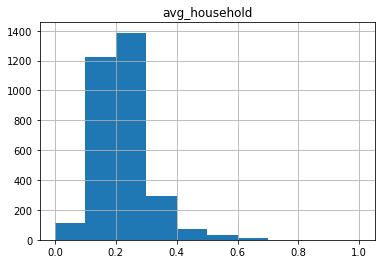

In [191]:
df.hist(column='avg_household')

array([[<AxesSubplot:title={'center':'population_density'}>]],
      dtype=object)

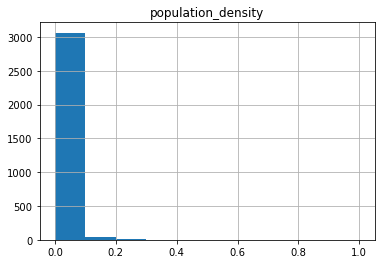

In [192]:
df.hist(column='population_density')

array([[<AxesSubplot:title={'center':'mask_use'}>]], dtype=object)

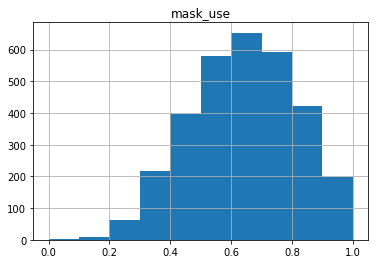

In [193]:
df.hist(column='mask_use')

array([[<AxesSubplot:title={'center':'cases_per_population'}>]],
      dtype=object)

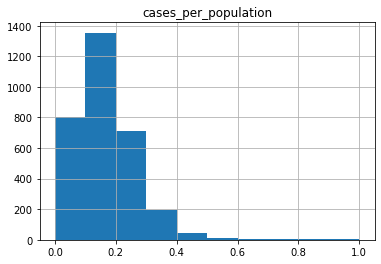

In [194]:
df.hist(column='cases_per_population')

array([[<AxesSubplot:title={'center':'deaths_per_case'}>]], dtype=object)

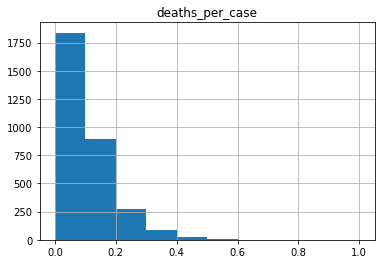

In [195]:
df.hist(column='deaths_per_case')

array([[<AxesSubplot:title={'center':'lockdown_score'}>]], dtype=object)

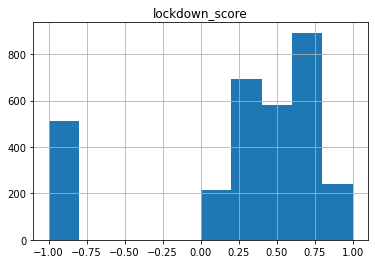

In [196]:
df.hist(column='lockdown_score')

<AxesSubplot:xlabel='mask_use', ylabel='cases_per_population'>

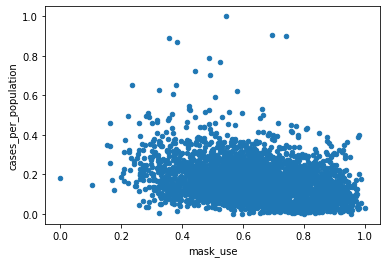

In [197]:
df.plot.scatter(x='mask_use', y='cases_per_population')

<AxesSubplot:xlabel='lockdown_score', ylabel='cases_per_population'>

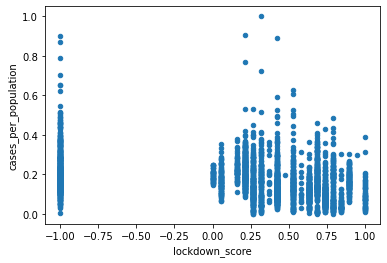

In [198]:
df.plot.scatter(x='lockdown_score', y='cases_per_population')

<AxesSubplot:xlabel='population_density', ylabel='cases_per_population'>

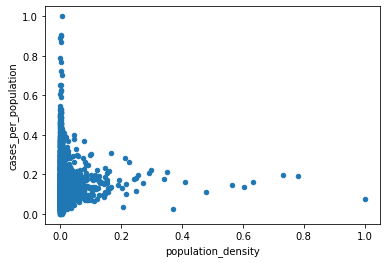

In [199]:
df.plot.scatter(x='population_density', y='cases_per_population')

<AxesSubplot:xlabel='mask_use', ylabel='lockdown_score'>

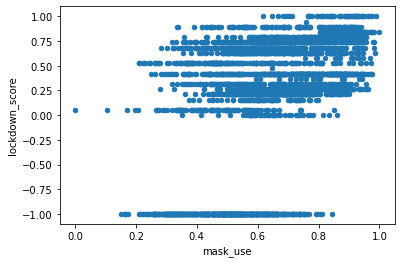

In [200]:
df.plot.scatter(x='mask_use', y='lockdown_score')

<AxesSubplot:xlabel='mask_use', ylabel='deaths_per_case'>

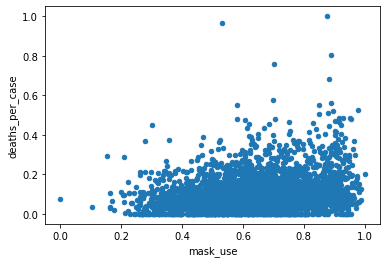

In [201]:
df.plot.scatter(x='mask_use', y='deaths_per_case')

### Generating Clustering Models